# Import necessary packages

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats  
from scipy.stats import binom
from scipy.stats import poisson
from google.colab import drive
from datetime import datetime

drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


# PART B

**CONTEXT:** Company X manages the men's top professional basketball division of the American league system. The dataset contains information
on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many
times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.

In [2]:
# Read the data set, clean the data and prepare final dataset to be used for analysis. 
Data = pd.read_csv('/content/drive/My Drive/AIML/Applied Statistic/Project/Basketball.csv')

In [3]:
Data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [4]:
Data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [6]:
# lets replace - with 0 so that column converted to int
Data['TournamentChampion'] = Data['TournamentChampion'].replace('-', 0)
Data['Runner-up'] = Data['Runner-up'].replace('-', 0)
Data['PlayedGames'] = Data['PlayedGames'].replace('-', 0)

# dropping team not played single games.
Data['PlayedGames'] = Data['PlayedGames'].astype(int)
Data = Data.drop(Data[Data['PlayedGames'] < 1].index)

Data['Score'] = Data['Score'].astype(int)
Data['WonGames'] = Data['WonGames'].astype(int)
Data['DrawnGames'] = Data['DrawnGames'].astype(int)
Data['LostGames'] = Data['LostGames'].astype(int)
Data['BasketScored'] = Data['BasketScored'].astype(int)
Data['BasketGiven'] = Data['BasketGiven'].astype(int)
Data['TournamentChampion'] = Data['TournamentChampion'].astype(int)
Data['Runner-up'] = Data['Runner-up'].astype(int)
Data['HighestPositionHeld'] = Data['HighestPositionHeld'].astype(int)

In [7]:
# consider only YYYY for Team Launch 
Data['TeamLaunch'] = Data['TeamLaunch'].str[:4]

In [8]:
# Calculate summary statistics, such as mean, median, standard deviation, minimum, and maximum, for each variable.
# This can help you understand the range and distribution of the data.
Data.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,20.000000


In [9]:
# Create a new feature how old Team is 
Data['YearsAgo-TeamLaunch'] = datetime.now().year - pd.to_numeric(Data['TeamLaunch'])

# Create a new feature % of Won, avg of basket given, avg of basket scored and scored
Data = Data.assign(wonper = Data['WonGames'] / Data['PlayedGames'] * 100)
Data = Data.assign(avgBasketgiven =  Data['BasketGiven'] / Data['PlayedGames'])
Data = Data.assign(avgBasketscored =  Data['BasketScored'] / Data['PlayedGames'])
Data = Data.assign(avgscored =  Data['Score'] / Data['PlayedGames'])

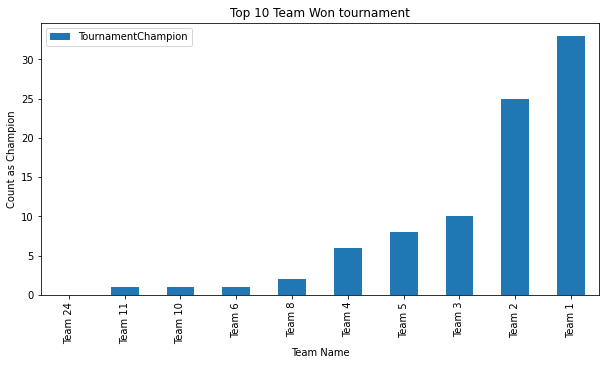

In [12]:
df = Data.sort_values(['TournamentChampion']).tail(10)
df.plot(x='Team',y='TournamentChampion',kind='bar',figsize=(10,5))
plt.title('Top 10 Team Won tournament')
plt.xlabel('Team Name')
plt.ylabel('Count as Champion')
plt.show()

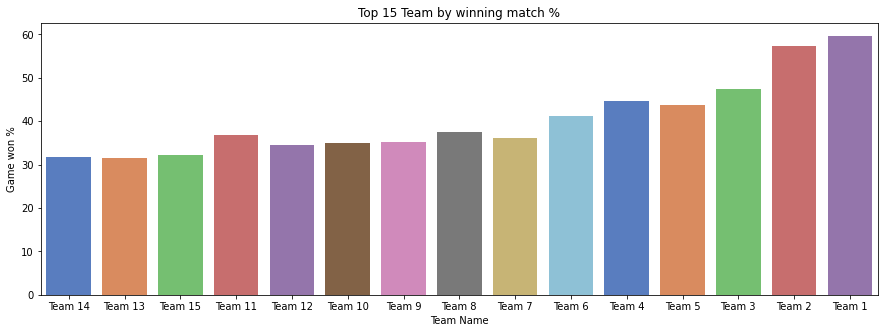

In [17]:
plt.figure(figsize=(15,5))  # setting the figure size
plt.title('Top 15 Team by winning match %')
df = Data.sort_values(['WonGames']).tail(15)
ax = sns.barplot(x='Team', y='wonper', data=df, palette='muted');  # barplot
ax.set_xlabel("Team Name");
ax.set_ylabel("Game won %");


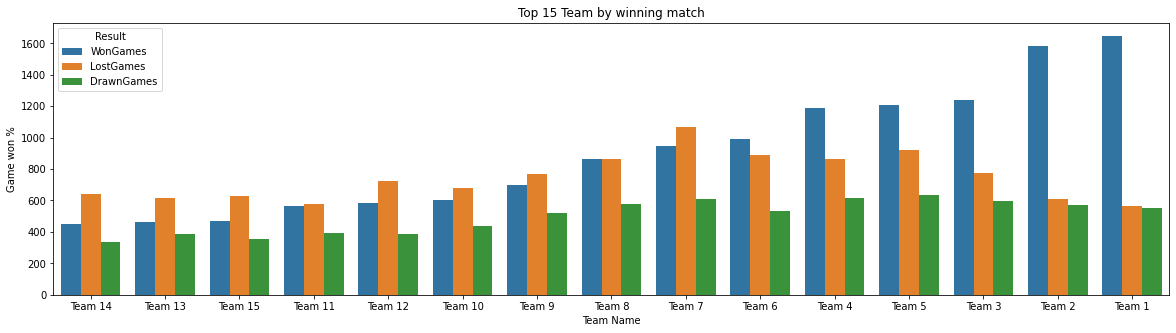

In [28]:
df = Data.loc[:, ['Team', 'WonGames','LostGames','DrawnGames']]
df = df.sort_values(['WonGames']).tail(15)
# Melt the DataFrame to convert the data from wide to long format
melted_df = df.melt(id_vars='Team', var_name='Result', value_name='Count')

plt.figure(figsize=(20,5))
plt.title('Top 15 Team by winning match')

ax = sns.barplot(x='Team', y='Count', hue='Result', data=melted_df)
ax.set_xlabel("Team Name");
ax.set_ylabel("Game won %");

plt.show()

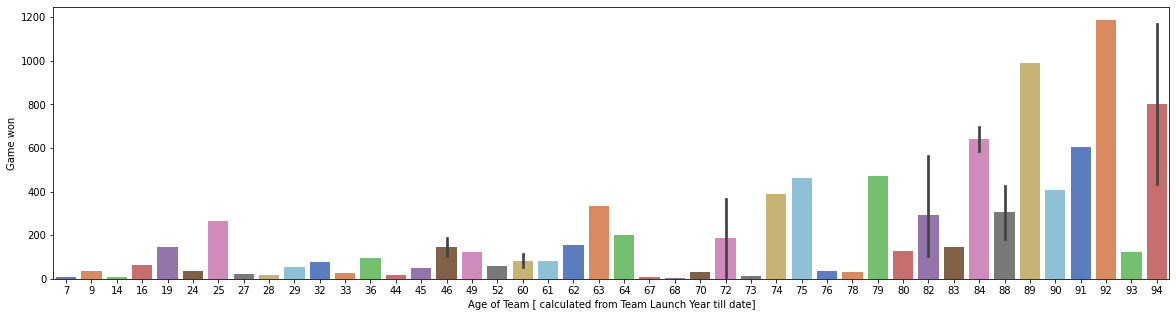

In [30]:
plt.figure(figsize=(20,5))  # setting the figure size
ax = sns.barplot(x='YearsAgo-TeamLaunch', y='WonGames', data=Data, palette='muted')
ax.set_xlabel("Age of Team [ calculated from Team Launch Year till date]");
ax.set_ylabel("Game won");


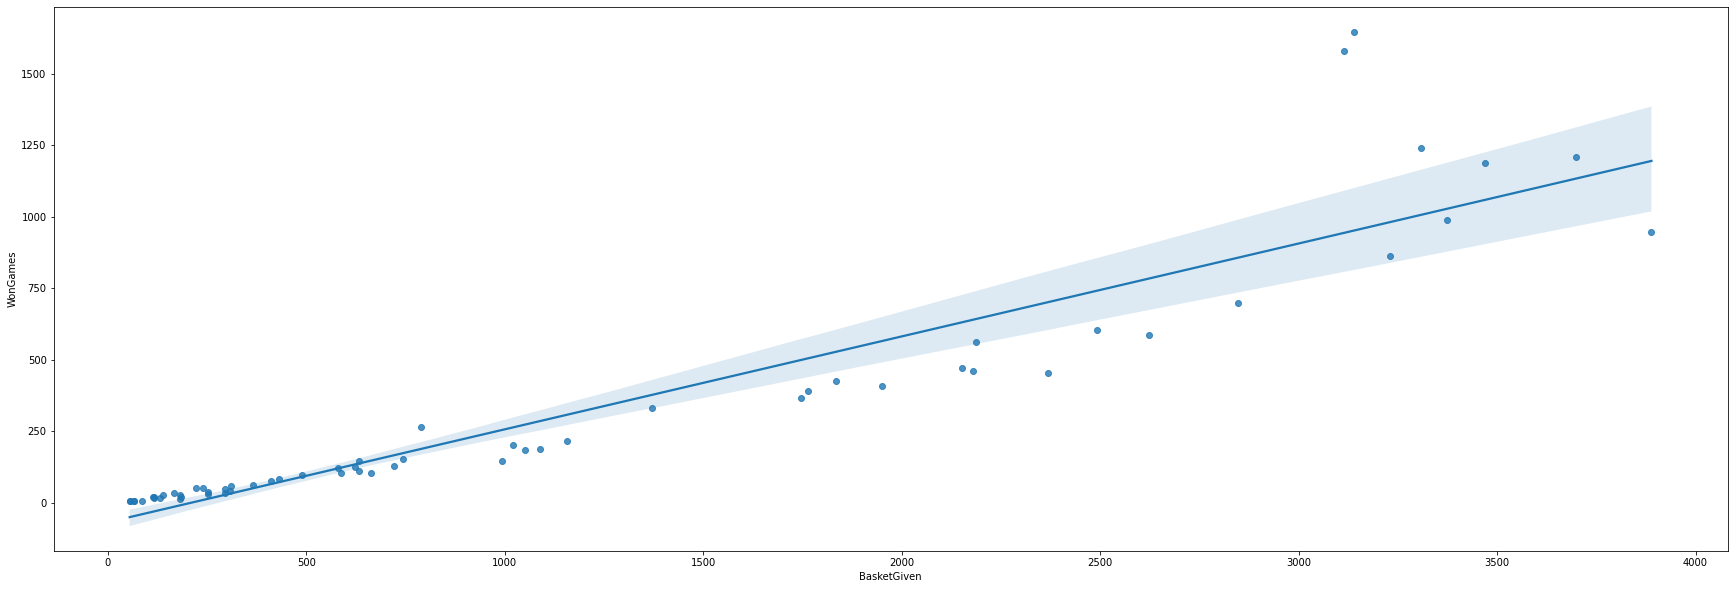

In [31]:
figure = plt.figure(figsize=(30,10))

ax = sns.regplot(x='BasketGiven',y='WonGames', data=Data ) 

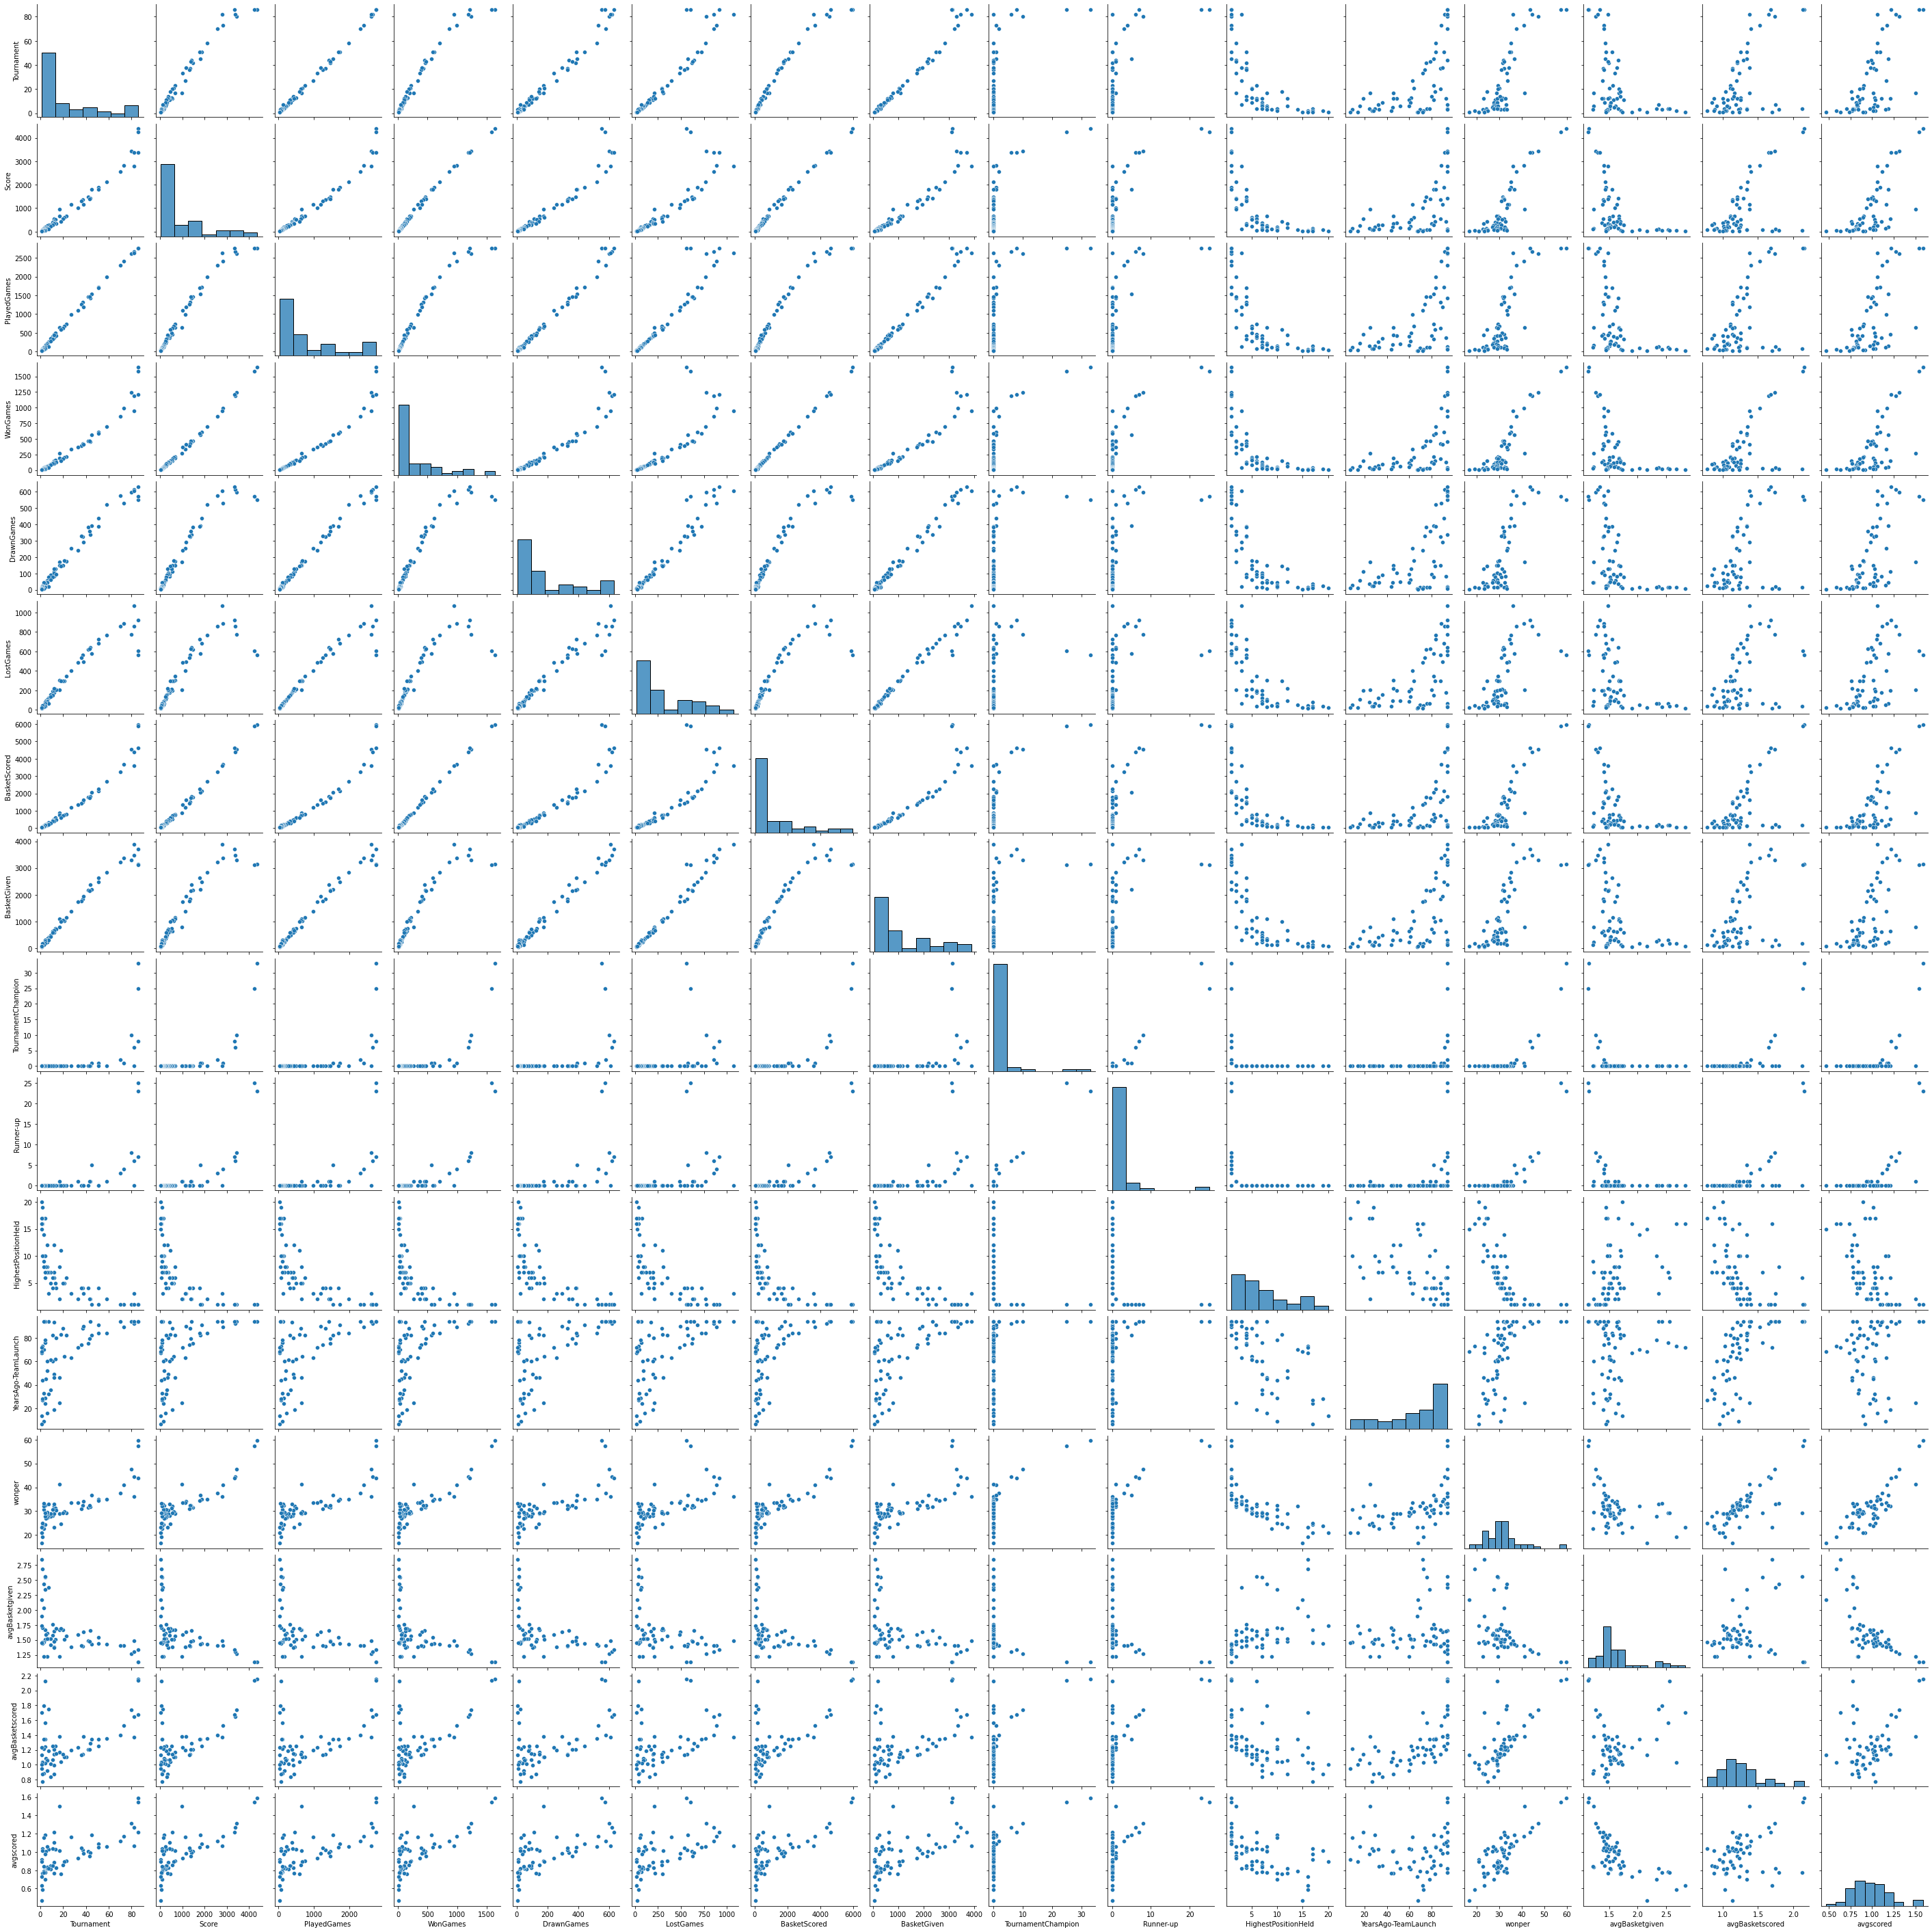

In [32]:
sns.pairplot(Data)

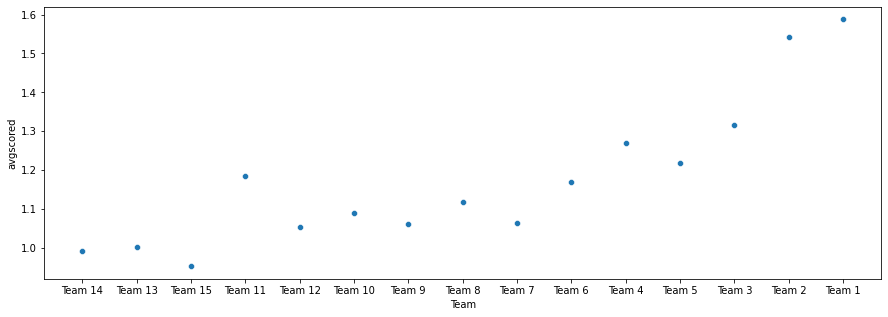

In [34]:
df = Data.sort_values(['WonGames']).tail(15)

fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x='Team', y='avgscored', data=df, ax=ax);

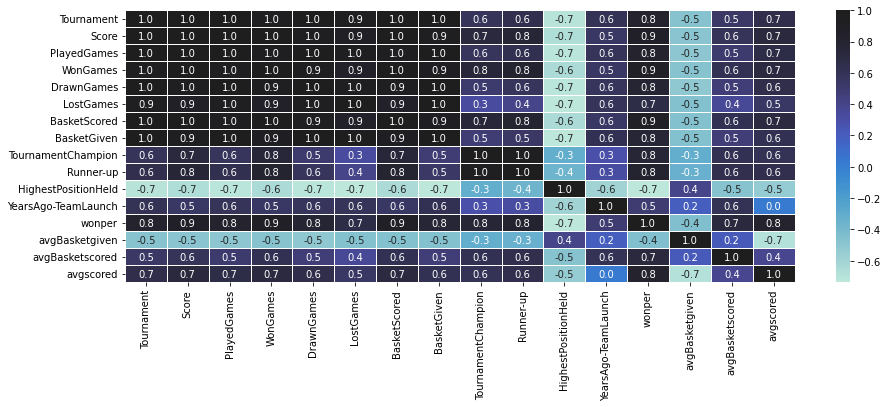

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show();

Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the
data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point.

Quality:

1.  Use standardized data formats to reduce errors and inconsistencies in data 
2.  Implement data validation checks to ensure that data is accurate, consistent, and complete. like team palyed tournament but played match is "-" is incorrect. 

Quantity:

1. Collect data at more frequent intervals to increase the amount of data collected, like Data by Tournament years and matches palyed against whcih team.

Variety:

1. Collect different types of data to provide a more comprehensive view of the team to analyzed, like fouls commited, Fouls Won, Top Scorer by tournament or by year, Team Manager, Match score Card to identify winning is comprehensive or difficult and same for lost matches.

Velocity:

1. it seems data is not collected as Automate processes due to very less information available this should be automate to reduce the time and effort required to collect data.
2. per match details should be capture so that more variety of data is aviabale near real time for analysis also.

Veracity: 

1. Implement data policies and procedures to ensure that data is accurate and consistent. like Team lunch year should be in single format, palyed, won, loss, draw etc should be numeric not object.